<h1><center>Data science for Geographers</center></h1>

<h2><center>Practical 5 - Creating Tables of Results</center></h2>

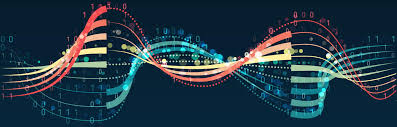

## Contents<a class="anchor" id="contents"></a>

- 1. [Introduction](#section1)
    - [Load the required packages](#section1.1)
    - [Load the data](#section1.2)
- 2. [Tables of Results](#section2)
    - [Simple linear regression](#section2.1)
    - [Adding another model](#section2.2)
    - [Logistic regression](#section2.3)
- 3. [Coefficient plots](#section3)
    - [Creating a coefficient plot](#section3.1)
    - [Exporting the plot as an image](#section3.2)


## 1. Introduction<a class="anchor" id="section1"></a>

By default, R produces a lot of statistical output, much of which we don't need to include in our reports. Typically, in a regression model table in an academic paper, you only need to report the coefficient (i.e. the effect size), the confidence interval and the p-value associated with the statistical test (i.e. the statistical significance of the effect). You also tend to indicate the level of significance using star notation. Something like the below:

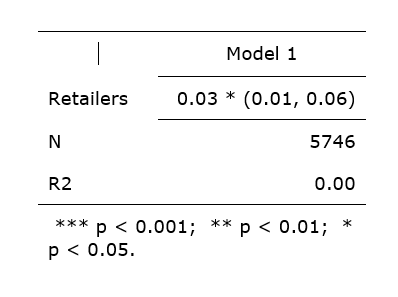

In this short notebook practical, we are going to look at some convenient ways to turn our R output into nicely formatted tables and figures like the above that can be imported straight into your written reports. Since R is an open-source software package, there is now a community of R users writing add-on packages that extend the functionality of the base R software. Some of these include packages that take raw R output and turn it into microsoft word tables and packages.

### Load the required packages<a class="anchor" id="section1.1"></a>

These packages are called `jtools`, `huxtable`, `IRdisplay` and `flextable`and because they are not already installed we need to install them. 

NOTE: This cell of commands will take a while to complete so be patient!

In [ ]:
install.packages("jtools")
install.packages("huxtable")
install.packages("IRdisplay")
install.packages("flextable")
install.packages("dotwhisker")
install.packages("table1")
install.packages("modelsummary")

And now let's load these packages including the `tidyverse` as we'll need this as well. You may see some messages about objects being masked being masked but it's fine to ignore these.

In [ ]:
library(tidyverse)
library(jtools)
library(huxtable)
library(IRdisplay)
library(flextable)
library(dotwhisker)
library(table1) #for nice 'Table 1' for papers
library(modelsummary)

### Load the data<a class="anchor" id="section1.2"></a>

Next let's load our data from the previous practical, contained in the `merged_data.csv` file...

In [ ]:
analysis_data <- read_csv("merged_data.csv")

In [ ]:
head(analysis_data, n = 100)

[Back to contents](#contents)

## 2. Tables of Results<a class="anchor" id="section2"></a>

### Simple linear regression<a class="anchor" id="section2.1"></a>

Let's start with producing tables of results from a simple linear regression. First, we need to run the linear regression. We'll do this using one of the models we ran in a previous practical (looking at the effect of tobacco retailers on smoking rates in only urban areas)... 

In [ ]:
#Create a new analysis object
urban_only <- analysis_data %>%
    filter(urban_rural_2cat == "Urban")

#Run a linear regression model
simple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj, 
       data = urban_only, 
       na.action = na.exclude)

Now we have a regression model output object called `simple_linear_regression`. Using some of the imported packages we installed earlier, we can now use this model object to produce some nicely formatted tables as a word document. 

Before you run the code, take a look at the various parts:

The first part, `IRdisplay::display_html(export_summs` means "use the display_HTML function from the `IRdisplay` library. The next bit is where we specify the model object we wish to tabulate, in this case our `simple_linear_regression`. The next bits (`model_info`, `model_fit`, `error_format`, `coefs`, `number_format` etc) allow you to specify different ways to format the table (see comments in the code for more information).

When you run the code you will see that it doesnt really seem to do anything (apart from produce an output cell with the word object repeated a few times, you can safely ignore this output!). Instead it will produce a word document which you can then download from noteable. The name and format of this file is specified in the final line. In this case we will produce a word document called "simple_linear_regression_results.docx".

In [ ]:
IRdisplay::display_html(export_summs( #Command to run
             simple_linear_regression, #Model object to include
             model_info = FALSE, #Whether to add some additional model info, change to true if you want this additional info.
             model_fit = FALSE, #Whether to add some additional model fit info, as above change to true if needed.
             error_format = "({conf.low}, {conf.high})", #How to present the confidence intervals
             coefs = c("Retailers" = "retailers_adj"), #What coefficients to include and the label to give it.
             statistics = NULL, #Include all descriptive statistics
             error_pos = "same", #Whether to include the confidence intervals on the 'same' row
             number_format = 4, #how many decimal places to include decimal places 
             to.file = "docx", 
                 file.name = "/home/jovyan/simple_linear_regression_results.docx")) #filename, location and file extension   

Now, navigate to the your home directory and you should see this new file. If you click the tick box next to the file and then click download you can view the new word document. Take a look at the table and make sure you can see and understand the various pieces of information. 
 
The example above has only one variable, but what if you had some confounders in the model? You an add these as well...

First let's add the `simd_income` variable to our model (note that we convert it to a factor in the regression command). We will give this model a new name, `linear_regression_with_confounder`.

In [ ]:
#Run a linear regression model
linear_regression_with_confounder <- 
    lm(smoking_rate ~ retailers_adj + as.factor(simd_quintile), #Note how we convert to a factor as part of the regression command
       data = urban_only, 
       na.action = na.exclude)

summary(linear_regression_with_confounder)

Now, we can add this new variable to our table of results. Note, as you can see above, because the new variable is a factor, it has multiple coefficients in our model and we need to specify each of these in our code to generate the table:

In [ ]:
IRdisplay::display_html(export_summs(linear_regression_with_confounder, 
             model_info = TRUE,
             model_fit = TRUE, 
             error_format = "({conf.low}, {conf.high})",
             coefs = c("Retailers" = "retailers_adj", #What coefficients to include.
                       "SIMD quintile 2" = "as.factor(simd_quintile)2", #Note we need to include ALL of the levels of the variable
                       "SIMD quintile 3" = "as.factor(simd_quintile)3",
                       "SIMD quintile 4" = "as.factor(simd_quintile)4",
                       "SIMD quintile 5" = "as.factor(simd_quintile)5"),
             statistics = NULL,
             error_pos = "same",
             number_format = 2,
             to.file = "docx", file.name = "/home/jovyan/linear_regression_results_confounder.docx")) #Remember where and what you named the file so you can find it in noteable!

You can add as many of the variables as you wish to these tables. 

Copy and paste the previous bits of code into some new cells and have a go at creating your own tables, first creating new models with additional variables, and then creating the output tables in word.

Remember, you can always make some edits to the table in word if you want to change font sizes and titles etc.

### Adding another model<a class="anchor" id="section2.2"></a>

Not only can we add additional variables, we can also present multiple models next to each other in the same table. Let's do this with our two models that we just estimated. This makes it easy to compare models side-by-side to look at the effects of adding more or less variables to your model. 

In [ ]:
IRdisplay::display_html(export_summs(simple_linear_regression, 
                                     linear_regression_with_confounder, #
             model_names = c("Model 1", "Model 2"),               
             model_info = FALSE,
             model_fit = FALSE, 
             error_format = "[{conf.low}, {conf.high}]",
             coefs = c("Retailers" = "retailers_adj",
                       "SIMD Quintile 2" = "as.factor(simd_quintile)2",
                       "SIMD Quintile 3" = "as.factor(simd_quintile)3",
                       "SIMD Quintile 4" = "as.factor(simd_quintile)4",
                       "SIMD Quintile 5" = "as.factor(simd_quintile)5"),
             statistics = NULL,
             error_pos = "same",
             number_format = 2, #2 decimal places
             to.file = "docx", file.name = "/home/jovyan/two_models.docx"))       

### Logistic regression<a class="anchor" id="section2.3"></a>

In the previous example we produced a table for a linear regression but we can of course do the same if we are predicting a binary variable using logistic regression.

Let's re-run our previous models predicting a binary smoking rate variable with firstly just our adjusted retailer density variable and then a second model where we add a confounder (simd_quintile).

In [ ]:
urban_only <- urban_only %>% 
    mutate(smoking_rate_binary = as.numeric(smoking_rate >= 20))

glm_simple <- glm(smoking_rate_binary ~ retailers_adj,
              data = urban_only,
              family = binomial(link='logit'),
              na.action = na.exclude)

glm_with_confounder <- glm(smoking_rate_binary ~ retailers_adj + as.factor(simd_quintile),
              data = urban_only,
              family = binomial(link='logit'),
              na.action = na.exclude)

summary(glm_simple)
summary(glm_with_confounder)

Now let's run the same command as before where we put both model reuslts into the same table. But this time with a few small changes. Check the code comments to see these changes...

NOTE: This command may take a few seconds to complete...

In [ ]:
IRdisplay::display_html(export_summs(glm_simple, glm_with_confounder, 
             model_info = FALSE,
             model_fit = FALSE, 
             error_format = "[{conf.low}, {conf.high}]",
             coefs = c("Retailer density" = "retailers_adj",
                       "SIMD Quintile 2" = "as.factor(simd_quintile)2",
                       "SIMD Quintile 3" = "as.factor(simd_quintile)3",
                       "SIMD Quintile 4" = "as.factor(simd_quintile)4",
                       "SIMD Quintile 5" = "as.factor(simd_quintile)5"),
             statistics = NULL,
             error_pos = "same",
             number_format = 4,
             exp = TRUE,    # Bonus! We can specify that we want odds ratios without having to calculate them ourselves!
             to.file = "docx", file.name = "/home/jovyan/logistic_output.docx"))  

Again, take a look at the produced word document and make sure you can understand what is included. Ask us if you not sure!

As before, have a go at making your own plots, perhapswith your own data. Also, play around with some of the options (e.g. maybe change the `model_info` and `model_fit` options to `true` to see what they do!).

[Back to contents](#contents)

## 3. Coefficient plots<a class="anchor" id="section3"></a>

Another way to present your regression results is to use graphs and plots. this can sometime be a nice visual way to communicate your analysis. We can do this using a package called `dwplot` which produces what is called a "dot and whisker plot". The dots correspondto the values of the coefficients and the whiskers represent the confidence intervals.

### Creating a coefficient plot<a class="anchor" id="section3.1"></a>

Let's use the same model plot we used before to show this (`glm_with_confounder`).

The code below will produce a dot and whisker coefficient plot. Don't worry it may look confusing but most of the lines of code are there to make some formatting adjustments to the plot and should be fairly self-evident.

In [ ]:
dwplot(glm_with_confounder, 
       dot_args = list(size = 5), #adjust the size of the dots
      whisker_args = list(size = 1)) +
  ggtitle("Odds Ratios\n for Smoking") + # Add a title to my graph note the "\n" added. This tells R to break onto a new line!
  xlab("Odds Ratio") + #Add an x axis title
  ylab("Coefficients") + #Add an y axis title
  theme(plot.title = element_text(size = 30, hjust = 0.5), #Adjust main title font size and centre justify (with 0.5)
        axis.text.x = element_text(size = 15), #Adjust font size for x axis labels
        axis.title.x = element_text(size = 15), #Adjust font size for x axis title
        axis.text.y = element_text(size = 15), #Adjust font size for y axis labels
        axis.title.y = element_text(size = 15)) + #Adjust font size for y axis title
  scale_y_discrete(labels=c("retailers_adj" = "Retailer Density",
                       "as.factor(simd_quintile)2" = "Quintile 2\n (Income Deprivation)", #Change the labels of the y axis
                       "as.factor(simd_quintile)3" = "Quintile 3\n (Income Deprivation)",
                       "as.factor(simd_quintile)4" = "Quintile 4\n (Income Deprivation)",
                       "as.factor(simd_quintile)5" = "Quintile 5\n (Income Deprivation)"))


Take a look at the produced plot and see how it displays the coefficients. Note how the confidence intervals are represented by the lines (or whiskers) through the dots. Now take a look at the commented lines in the code which detail all of the different options you can change.

Copy and paste the code above into the empty cell below and tweak some of the options to change the plot in various ways. Perhaps adjust the font sizes or maybe change the size of the dots and whiskers.

### Exporting the plot as an image<a class="anchor" id="section3.2"></a>

Now, rather than copying and pasting this plot into our report. We can save it as a `jpg` image file using `ggsave`. 

First we save the plot into a new object called `my_dwplot`...

In [ ]:
my_dwplot <- dwplot(glm_with_confounder, #Place the plot into an object called my_dwplot
       dot_args = list(size = 5),
      whisker_args = list(size = 2)) +
  ggtitle("Odds Ratios\n for Smoking") + # Add a title to my graph note the "\n" added. This tells R to break onto a new line!
  xlab("Odds Ratio") + #Add an x axis title
  ylab("Coefficients") + #Add an y axis title
  theme(plot.title = element_text(size = 30, hjust = 0.5), #Adjust main title font size and centre justify (with 0.5)
        axis.text.x = element_text(size = 15), #Adjust font size for x axis labels
        axis.title.x = element_text(size = 15), #Adjust font size for x axis title
        axis.text.y = element_text(size = 15), #Adjust font size for y axis labels
        axis.title.y = element_text(size = 15)) + #Adjust font size for y axis title
  scale_y_discrete(labels=c("retailers_adj" = "Retailer Density",
                       "as.factor(simd_quintile)2" = "Quintile 2\n (Income Deprivation)", #Change the labels of the y axis
                       "as.factor(simd_quintile)3" = "Quintile 3\n (Income Deprivation)",
                       "as.factor(simd_quintile)4" = "Quintile 4\n (Income Deprivation)",
                       "as.factor(simd_quintile)5" = "Quintile 5\n (Income Deprivation)"))


Now we can take this plot object and export it to our image file by using `ggsave` and specifying the plot object and a filename with an image file extension (`.jpg`).

In [ ]:
ggsave(plot = my_dwplot, 
       "/home/jovyan/dwplot_smoking_simd_retailers.jpg") #Note I am saving it to my home 
                                                         #directory (i.e. /home/jovyan) 
                                                         #but you can adjust the path to 
                                                         #save it somewhere else if you like!

If you navigate to the location where you saved the file, you can download it as an image and also import into your word document. You can do this for any graph or plot you produce in R and is the best way to import graphical output into your report.

[Back to contents](#contents)